In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier

In [2]:
training_data = pd.read_csv("../Data/train_lyrics_1000.csv",header=0,encoding='utf-8')
testing_data = pd.read_csv("../Data/valid_lyrics_200.csv",header=0,encoding='utf-8')

In [3]:
# Step - a : Remove blank rows if any.
training_data['lyrics'].dropna(inplace=True)
testing_data['lyrics'].dropna(inplace=True)

In [4]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
training_data['lyrics'] = [entry.lower() for entry in training_data['lyrics']]
testing_data['lyrics'] = [entry.lower() for entry in testing_data['lyrics']]

In [5]:
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
training_data['lyrics']= [word_tokenize(entry) for entry in training_data['lyrics']]
testing_data['lyrics']= [word_tokenize(entry) for entry in testing_data['lyrics']]

In [6]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [7]:
for index,entry in enumerate(training_data['lyrics']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    training_data.loc[index,'text_final'] = str(Final_words)

In [8]:
for index,entry in enumerate(testing_data['lyrics']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    testing_data.loc[index,'text_final'] = str(Final_words)

In [9]:
# Splitting the Dataset and Label Encoding the Target Variables

train_x = training_data['text_final']
valid_x = testing_data['text_final']
train_y = training_data['mood']
valid_y = testing_data['mood']

In [10]:
train_x

0      ['verse', 'one', 'alright', 'might', 'little',...
1      ['adam', 'pirroni', 'every', 'girl', 'somethin...
2      ['erase', 'get', 'world', 'sale', 'walk', 'awa...
3      ['little', 'darling', 'long', 'think', 'ya', '...
4      ['lead', 'vocal', 'greg', 'well', 'late', 'nig...
5      ['imagine', 'whole', 'world', 'sharin', 'one',...
6      ['first', 'let', 'say', 'look', 'tired', 'rest...
7      ['james', 'james', 'hold', 'ladder', 'steady',...
8      ['conclusion', 'illusion', 'mainstream', 'intr...
9      ['ai', 'love', 'ai', 'love', 'ai', 'love', 'ai...
10     ['brick', 'brick', 'stone', 'stone', 'dismantl...
11     ['make', 'difference', 'kind', 'life', 'fate',...
12     ['angie', 'angie', 'cloud', 'disappear', 'angi...
13     ['day', 'day', 'night', 'night', 'blind', 'neo...
14     ['ever', 'make', 'back', 'nashville', 'remembe...
15     ['see', 'want', 'somehow', 'feeling', 'grows',...
16     ['chorus', 'cheek', 'lady', 'mens', 'evening',...
17     ['rip', 'hold', 'tell', 

In [11]:
# Label Encoding

Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
valid_y = Encoder.fit_transform(valid_y)

# Feature Engineering

## Count Vectors as Features

In [12]:
all_texts = []

#Appending Training Set Texts
for items in train_x:
    all_texts.append(items)
    
#Appending Validation Set Texts
for items in valid_x:
    all_texts.append(items)

In [13]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [14]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

## TF-IDF Vectors as Features

In [15]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word',max_features=5000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=5000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# Topic Models as Features

In [16]:
# train a LDA Model

lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

# Function to Deploy Models

In [17]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

# Naive Bayes Classifier

In [18]:
# Naive Bayes on Count Vectors
accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_nb)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_ngram_nb)

NB, Count Vectors:  0.715
NB, WordLevel TF-IDF:  0.58
NB, N-Gram Vectors:  0.55


# Random Forest Classifier

In [19]:
#Random Forest on Count Vectors
accuracy_count_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_count,train_y,xvalid_count)
print("RF, Count Vectors: ",accuracy_count_rf)

#Random Forest on Word Level TF IDF Vectors
accuracy_word_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf,train_y,xvalid_tfidf)
print("RF, WordLevel TF-IDF Vectors: ",accuracy_word_rf)

#Random Forest Ngram Level TF IDF Vectors
accuracy_ngram_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ",accuracy_ngram_rf)

RF, Count Vectors:  0.635
RF, WordLevel TF-IDF Vectors:  0.66
RF, N-Gram Vectors:  0.58


# Linear Classifier: Logistic Regression

In [20]:
# Linear Classifier on Count Vectors
accuracy_count_lc = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy_count_lc)

# Linear Classifier on Word Level TF IDF Vectors
accuracy_word_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy_word_lc)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_ngram_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy_ngram_lc) 

LR, Count Vectors:  0.66
LR, WordLevel TF-IDF:  0.7
LR, N-Gram Vectors:  0.515


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM

In [21]:
# SVM on Count Vectors
accuracy_count_svm = train_model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), xtrain_count, train_y, xvalid_count)
print ("SVM,Count Vectors: ", accuracy_count_svm)

# SVM on Word Level TF-IDF Vectors
accuracy_word_svm = train_model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, Word Level TF-IDF Vectors: ", accuracy_word_svm)

# SVM on Ngram Level TF IDF Vectors
accuracy_ngram_svm = train_model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy_ngram_svm)

SVM,Count Vectors:  0.655
SVM, Word Level TF-IDF Vectors:  0.685
SVM, N-Gram Vectors:  0.54


# Bagging Model

In [22]:
# RF on Count Vectors
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

# RF on Word Level TF IDF Vectors
accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

# RF on Ngram Vectors
accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.615
RF, WordLevel TF-IDF:  0.605
RF, Ngram Vectors:  0.57


# Boosting Model

In [23]:
# Extereme Gradient Boosting on Count Vectors
accuracy_count_bo = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy_count_bo)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_word_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy_word_bo)

# Extereme Gradient Boosting on NGRAM Level TF IDF Vectors
accuracy_ngram_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
print ("Xgb, Ngram Level Vectors: ", accuracy_ngram_bo)

Xgb, Count Vectors:  0.635
Xgb, WordLevel TF-IDF:  0.62
Xgb, Ngram Level Vectors:  0.585


# Shallow Neural Networks

In [24]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

# Implementing on Count Vectors
classifier = create_model_architecture(xtrain_count.shape[1])
accuracy_count_snn = train_model(classifier, xtrain_count, train_y, xvalid_count, is_neural_net=True)
print ("NN, Count Vectors",  accuracy_count_snn)

# Implementing on Word Level TF-IDF
classifier = create_model_architecture(xtrain_tfidf.shape[1])
accuracy_word_snn = train_model(classifier, xtrain_tfidf, train_y, xvalid_tfidf, is_neural_net=True)
print ("NN, Word Level TFIDf Vectors",  accuracy_word_snn)

# Implementing on Ngram Level TF-IDF
classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy_ngram_snn = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors",  accuracy_ngram_snn)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1000/1000 [==============================] - 1s 895us/step - loss: 0.6598
NN, Count Vectors 0.525
Epoch 1/1
1000/1000 [==============================] - 1s 796us/step - loss: 0.6850
NN, Word Level TFIDf Vectors 0.525
Epoch 1/1
1000/1000 [==============================] - 1s 627us/step - loss: 0.6906
NN, Ngram Level TF IDF Vectors 0.525


# Summary

### Using Count Vectors

In [25]:
print('Naive Bayes Classifier')
print ("NB, Count Vectors: ", round(accuracy_count_nb*100,2),"%")
print("")

print('Random Forest Classifier')
print("RF, Count Vectors: ",round(accuracy_count_rf*100,2),"%")
print("")

print('Linear Classifier')
print ("LR, Count Vectors: ", round(accuracy_count_lc*100,2),"%")
print("")

print('SVM Classifier')
print ("SVM,Count Vectors: ", round(accuracy_count_svm*100,2),"%")
print("")

print('Bagging Classifier')
print ("RF, Count Vectors: ", round(accuracy_count_bg*100,2),"%")
print("")

print('Boosting Classifier')
print ("Xgb, Count Vectors: ", round(accuracy_count_bo*100,2),"%")
print("")

print('Shallow Neural Networks Classifier')
print ("NN, Count Vectors",  round(accuracy_count_snn*100,2),"%")

Naive Bayes Classifier
NB, Count Vectors:  71.5 %

Random Forest Classifier
RF, Count Vectors:  63.5 %

Linear Classifier
LR, Count Vectors:  66.0 %

SVM Classifier
SVM,Count Vectors:  65.5 %

Bagging Classifier
RF, Count Vectors:  61.5 %

Boosting Classifier
Xgb, Count Vectors:  63.5 %

Shallow Neural Networks Classifier
NN, Count Vectors 52.5 %


### Using Word Level TF-IDF Vectors

In [26]:
print('Naive Bayes Classifier')
print ("NB, WordLevel TF-IDF: ", round(accuracy_word_nb*100,2),"%")
print("")

print('Random Forest Classifier')
print("RF, WordLevel TF-IDF Vectors: ",round(accuracy_word_rf*100,2),"%")
print("")

print('Linear Classifier')
print ("LR, WordLevel TF-IDF: ", round(accuracy_word_lc*100,2),"%")
print("")

print('SVM Classifier')
print ("SVM, Word Level TF-IDF Vectors: ", round(accuracy_word_svm*100,2),"%")
print("")

print('Bagging Classifier')
print ("RF, WordLevel TF-IDF: ", round(accuracy_word_bg*100,2),"%")
print("")

print('Boosting Classifier')
print ("Xgb, WordLevel TF-IDF: ", round(accuracy_word_bo*100,2),"%")
print("")

print('Shallow Neural Networks Classifier')
print ("NN, Word Level TFIDf Vectors",  round(accuracy_word_snn*100,2),"%")

Naive Bayes Classifier
NB, WordLevel TF-IDF:  58.0 %

Random Forest Classifier
RF, WordLevel TF-IDF Vectors:  66.0 %

Linear Classifier
LR, WordLevel TF-IDF:  70.0 %

SVM Classifier
SVM, Word Level TF-IDF Vectors:  68.5 %

Bagging Classifier
RF, WordLevel TF-IDF:  60.5 %

Boosting Classifier
Xgb, WordLevel TF-IDF:  62.0 %

Shallow Neural Networks Classifier
NN, Word Level TFIDf Vectors 52.5 %


### Using Ngram TF-IDF Vectors

In [27]:
print('Naive Bayes Classifier')
print ("NB, Ngram Vectors: ", round(accuracy_ngram_nb*100,2),"%")
print("")

print('Random Forest Classifier')
print("RF, Ngram Vectors: ",round(accuracy_ngram_rf*100,2),"%")
print("")

print('Linear Classifier')
print ("LR, Ngram Vectors: ", round(accuracy_ngram_lc*100,2),"%")
print("")

print('SVM Classifier')
print ("SVM, Ngram Vectors: ", round(accuracy_ngram_svm*100,2),"%")
print("")

print('Bagging Classifier')
print ("RF, Ngram Vectors: ", round(accuracy_ngram_bg*100,2),"%")
print("")

print('Boosting Classifier')
print ("Xgb, Ngram Vectors: ", round(accuracy_ngram_bo*100,2),"%")
print("")

print('Shallow Neural Networks Classifier')
print ("NN, Ngram Vectors",  round(accuracy_ngram_snn*100,2),"%")

Naive Bayes Classifier
NB, Ngram Vectors:  55.0 %

Random Forest Classifier
RF, Ngram Vectors:  58.0 %

Linear Classifier
LR, Ngram Vectors:  51.5 %

SVM Classifier
SVM, Ngram Vectors:  54.0 %

Bagging Classifier
RF, Ngram Vectors:  57.0 %

Boosting Classifier
Xgb, Ngram Vectors:  58.5 %

Shallow Neural Networks Classifier
NN, Ngram Vectors 52.5 %


In [28]:
# Plotting the confusion Matrix Using Logistic Regression on Word Level TF-IDF

import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.show()

# Plotting Confusion Matrix

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

claf = linear_model.LogisticRegression()
claf.fit(xtrain_tfidf, train_y)
plot_cm(xtrain_tfidf, train_y, claf, 'Training Word Level - TfidfVectorizer on LR')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 400x200 with 1 Axes>

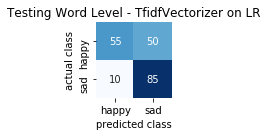

In [30]:
plot_cm(xvalid_tfidf,valid_y, claf, 'Testing Word Level - TfidfVectorizer on LR')

# Calculating F-1 Measure

In [31]:
#precision = (TP)/(TP+FP) 
#recall = (TP)/(P)
#accuracy = (TP+TN)/(P+N)
#f-measure = 2 * (precision x recall)/(precision + recall)

### Training Level Metrics

In [32]:
precision_train = 363/(363+83)
recall_train = 363/383
accuracy_train = (363+534)/(1000)
f_score_train = 2 * ((precision_train * recall_train)/(precision_train+recall_train))

In [33]:
print("Precision of the Training Set is: ",round(precision_train*100,2),"%")
print("Recall of the Training Set is: ",round(recall_train*100,2),"%")
print("Accuracy of the Training Set is: ",round(accuracy_train*100,2),"%")
print("F1 Score of the Training Set is: ",round(f_score_train*100,2),"%")

Precision of the Training Set is:  81.39 %
Recall of the Training Set is:  94.78 %
Accuracy of the Training Set is:  89.7 %
F1 Score of the Training Set is:  87.58 %


### Testing Level Metrics

In [34]:
precision_test = 55/(55+50)
recall_test = 55/(55+10)
accuracy_test = (55+85)/(200)
f_score_test = 2 * ((precision_test * recall_test)/(precision_test + recall_test))

print("Precision of the Testing Set is: ",round(precision_test*100,2),"%")
print("Recall of the Testing Set is: ",round(recall_test*100,2),"%")
print("Accuracy of the Testing Set is: ",round(accuracy_test*100,2),"%")
print("F1 Score of the Testing Set is: ",round(f_score_test*100,2),"%")

Precision of the Testing Set is:  52.38 %
Recall of the Testing Set is:  84.62 %
Accuracy of the Testing Set is:  70.0 %
F1 Score of the Testing Set is:  64.71 %


In [38]:
print(xvalid_tfidf)

  (0, 79)	0.1360920489008954
  (0, 142)	0.06380114358012434
  (0, 219)	0.07858161221939174
  (0, 366)	0.042902656627140406
  (0, 693)	0.07836210060985256
  (0, 875)	0.14118811487871943
  (0, 1050)	0.037114915701009776
  (0, 1340)	0.05505797109837402
  (0, 1439)	0.06605004348063832
  (0, 1581)	0.06605004348063832
  (0, 1634)	0.12918486797780904
  (0, 1846)	0.13550732543096755
  (0, 1920)	0.16794460094391794
  (0, 1963)	0.04243885592969903
  (0, 2421)	0.032170061420326634
  (0, 2682)	0.3715810777666985
  (0, 2919)	0.0704276292313648
  (0, 2989)	0.7461550311171656
  (0, 3635)	0.04274591396915979
  (0, 3813)	0.06509151516026868
  (0, 4128)	0.17880595517128628
  (0, 4337)	0.12760228716024868
  (0, 4338)	0.14527464011840313
  (0, 4402)	0.025482273698442137
  (0, 4561)	0.17676770979134648
  :	:
  (199, 1779)	0.08496435139139356
  (199, 1928)	0.07968542959019877
  (199, 2224)	0.07384034503866985
  (199, 2274)	0.02462487238392175
  (199, 2361)	0.03300068733256394
  (199, 2734)	0.064272816190994

### Plotting ROC Curves

In [42]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = claf.predict_proba(xvalid_tfidf)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(valid_y, preds)
roc_auc = metrics.auc(fpr, tpr)

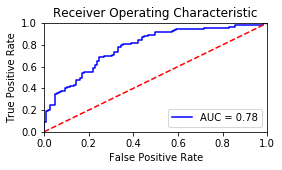

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()